In [1]:
import pandas as pd

data_dir = 'C:/ZhangLI/Codes/DataSet/个人违贷/official_data/'
# data_dir = 'E:/Dataset/个人违贷/official_data/'
train_pub = pd.read_csv(data_dir+'train_public.csv')
train_net = pd.read_csv(data_dir+'train_internet.csv')
test_pub = pd.read_csv(data_dir+'test_public.csv')

In [122]:
# 查看数据维度
def describe_data(train, test):
    print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
    print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')
    print('-' * 50)
    # 查看哪些列具有缺失值
    print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')
    print(f'The train missing column: {train.columns[train.isna().any()].tolist()}.')
    for i in train.columns[train.isna().any()].tolist():
        print(f'The missing rate of \'{i}\' is {train[i].isna().sum() / train.shape[0]}')
    print(f'There are {test.isnull().any().sum()} columns in test dataset with missing values.')
    print(f'The test missing column: {test.columns[test.isna().any()].tolist()}.')
    for i in test.columns[test.isna().any()].tolist():
        print(f'The missing rate of \'{i}\' is {test[i].isna().sum() / test.shape[0]}')
    # 查看数据值唯一的列
    one_value_cols = []
    one_value_cols += [col for col in train.columns if train[col].nunique() <= 1]
    one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]
    print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')
    print(f'{one_value_cols} of unique values in the train set')
    print(f'There are {len(one_value_cols_test)} columns in test dataset with one unique value.')
    print(f'{one_value_cols_test} of unique values in the test set')
    print('-' * 50)
    # 查看数据缺失值情况
    nan_clos = [col for col in train.columns if train[col].isna().sum() / train.shape[0] > 0.90]
    print(f'There are {len(nan_clos)} columns in train dataset with [na value > 0.9].')
    nan_clos_test = [col for col in test.columns if test[col].isna().sum() / test.shape[0] > 0.90]
    print(f'There are {len(nan_clos_test)} columns in test dataset with [na value > 0.9].')
    print('-' * 50)
    numerical_col = list(train.select_dtypes(exclude=['object']).columns)
    category_col = list(filter(lambda x: x not in numerical_col,list(train.columns)))
    print(f'The numerical columns is: {numerical_col}')
    print(f'The category columns is: {category_col}')
    
    return one_value_cols + nan_clos
    
describe_data(train_pub, test_pub)
# describe_data(train_net, train_net)


# 查看数据类型
# print('The train dtype:')
# origin_train.dtypes
# # 查看缺失值并排序
train_net.isna().sum().sort_values(ascending=False)
# # 删除缺失值大于95%
# origin_train.columns[(origin_train.isna().sum() / origin_train.shape[0])>0.89]
# 查看特征类型 and 判断类别型
# train_net.nunique().sort_values()
print('')

Train dataset has 10000 rows and 39 columns.
Test dataset has 5000 rows and 35 columns.
--------------------------------------------------
There are 7 columns in train dataset with missing values.
The train missing column: ['work_year', 'pub_dero_bankrup', 'f0', 'f1', 'f2', 'f3', 'f4'].
The missing rate of 'work_year' is 0.0622
The missing rate of 'pub_dero_bankrup' is 0.0007
The missing rate of 'f0' is 0.0498
The missing rate of 'f1' is 0.0858
The missing rate of 'f2' is 0.0498
The missing rate of 'f3' is 0.0498
The missing rate of 'f4' is 0.0498
There are 7 columns in test dataset with missing values.
The test missing column: ['f4', 'f2', 'work_year', 'f3', 'f0', 'pub_dero_bankrup', 'f1'].
The missing rate of 'f4' is 0.0518
The missing rate of 'f2' is 0.0518
The missing rate of 'work_year' is 0.0556
The missing rate of 'f3' is 0.0518
The missing rate of 'f0' is 0.0518
The missing rate of 'pub_dero_bankrup' is 0.0008
The missing rate of 'f1' is 0.0908
There are 1 columns in train data

1. 处理完特征后，不连接 internet的数据，使用1w进行训练


In [120]:
# train_pub['policy_code'].value_counts() 
train_net['isDefault'] = train_net['is_default']
common_feature = list(set(train_pub.columns).intersection(set(train_net.columns)))
train_pub_new = train_pub[common_feature]
train_net_new = train_net[common_feature]


['class',
 'employer_type',
 'industry',
 'work_year',
 'issue_date',
 'earlies_credit_mon']

<Figure size 432x288 with 0 Axes>

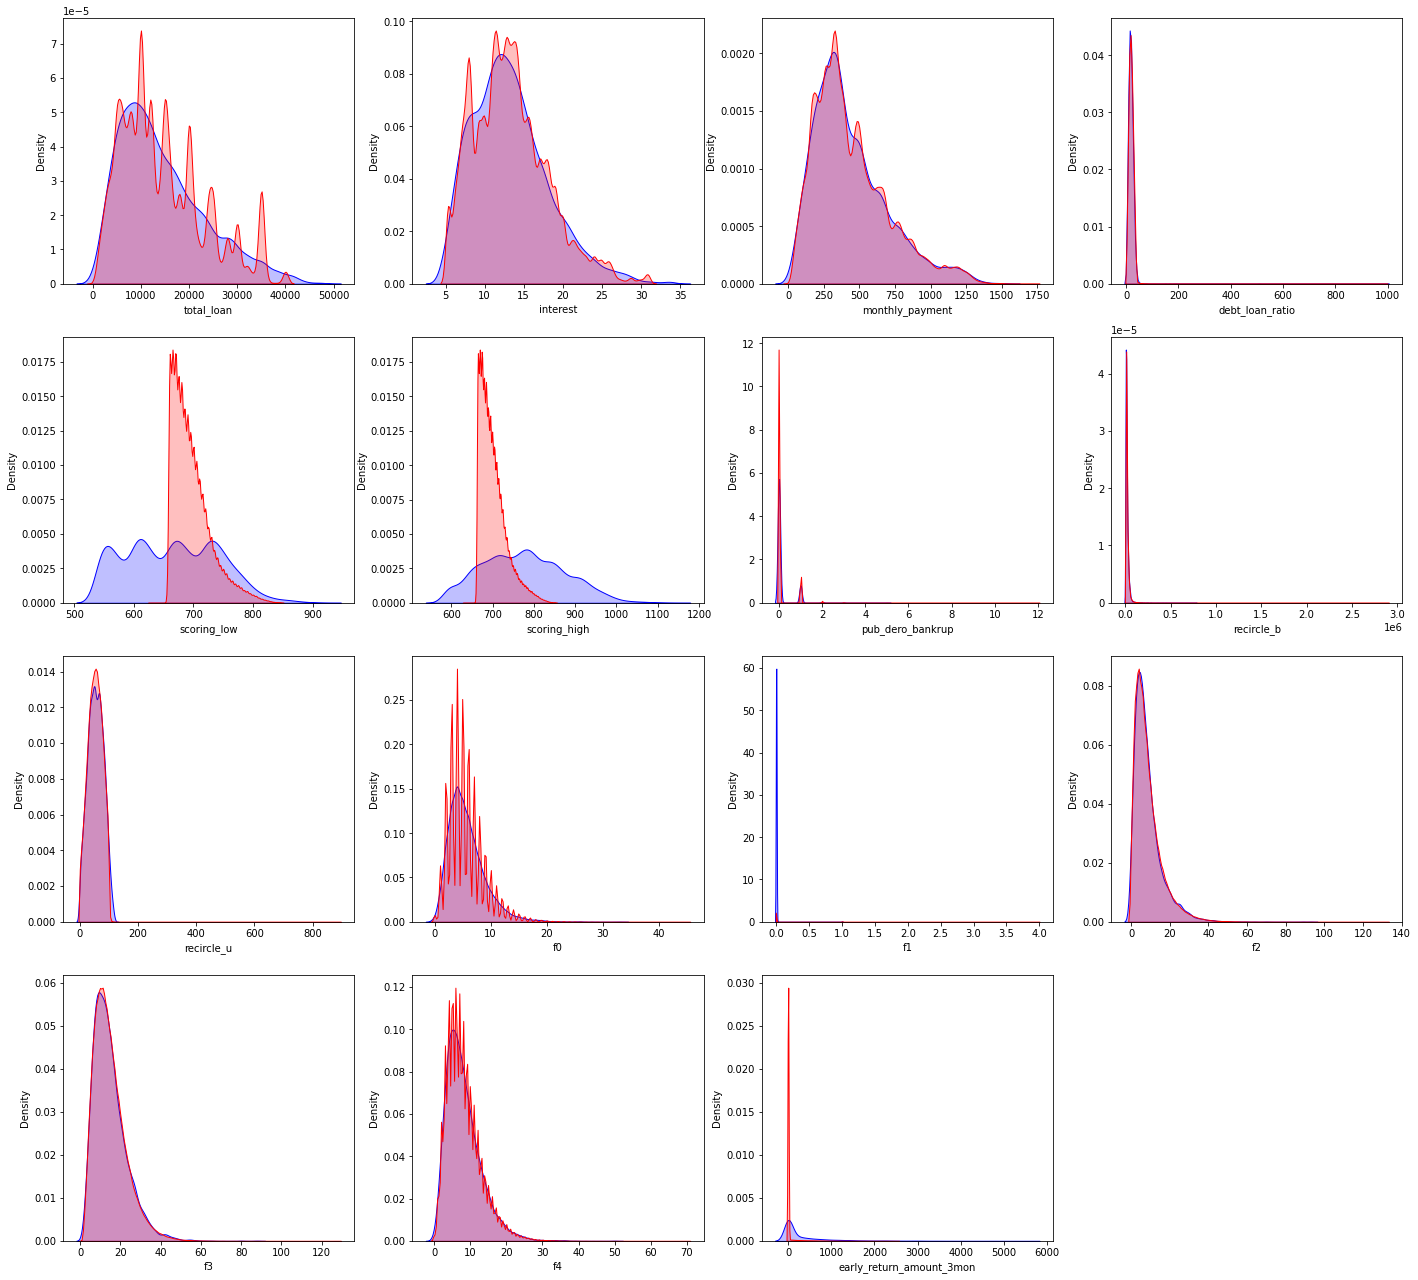

In [3]:
# plot the feature kde
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_kde(train_data, test_data, features=[]):
    """连续变量"""
    plt.clf()
    fcols = 4
    frows = len(features)
    plt.figure(figsize=(6*fcols, frows*1.5))
    i = 0
    for col in features:
        i += 1
        plt.subplot(frows//fcols+1, fcols, i)
        sns.kdeplot(train_data[col], color="Blue", shade=True, label='Train')
        sns.kdeplot(test_data[col], color="Red", shade=True, label='Test')
    plt.show()
feature_type = get_feature_type(train_pub)

# drop ['user_id', 'loan_id'] earnly_return ?  'scoring_low', 'scoring_high', 'f1', 'early_return_amount_3mon' 这个应该怎么分析
# object ?
feature_type['int64'].remove('known_outstanding_loan')
feature_type['int64'].remove('known_dero')
feature_type['int64'].remove('app_type')
# plot_feature_kde(train_pub, test_pub, ['recircle_u', 'known_dero'])
train_net.scoring_low.value_counts(ascending=True)
# test_pub.known_dero.value_counts(ascending=True)
train_pub[['class','employer_type','industry','work_year','issue_date','earlies_credit_mon']]
train_pub['employer_type'].unique()
train_net['pub_dero_bankrup'].isna().sum()
# train_pub['work_year'].isna().sum()
plot_feature_kde(train_pub, train_net, feature_type['float64'])

c:\zhangli\software\installer\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\zhangli\software\installer\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

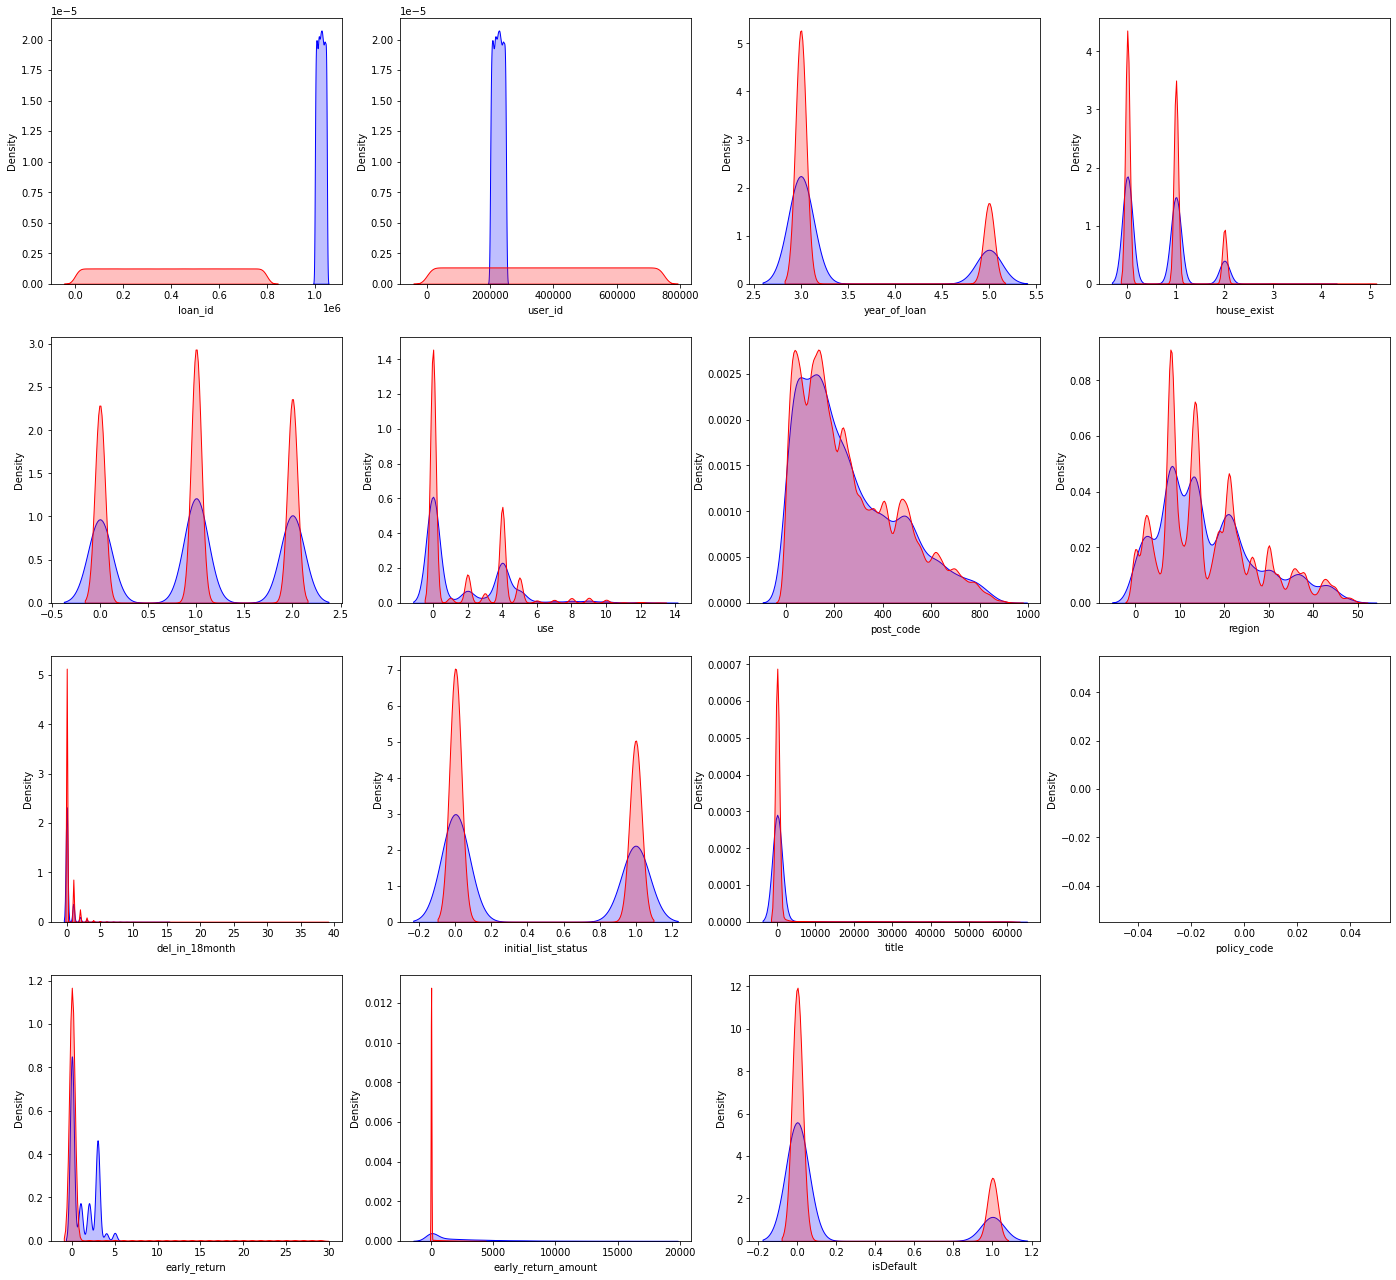

In [4]:
plot_feature_kde(train_pub, train_net, feature_type['int64'])

<Figure size 432x288 with 0 Axes>

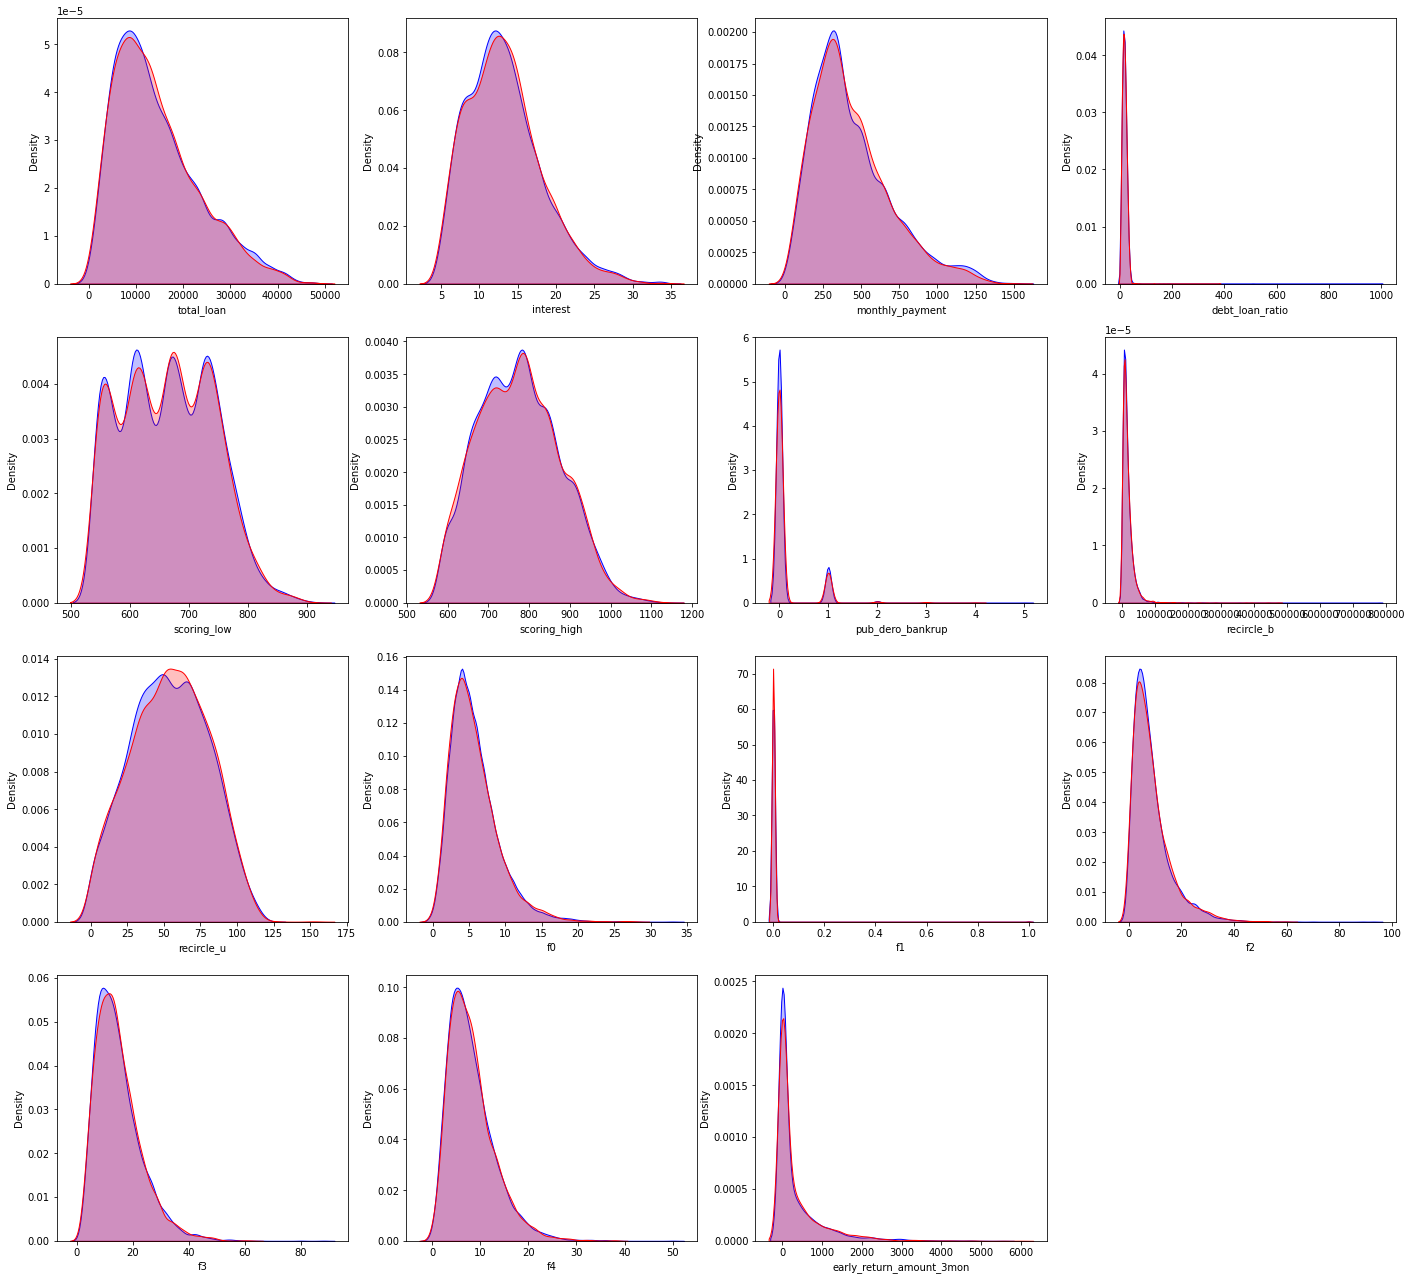

In [115]:
plot_feature_kde(train_pub, test_pub, feature_type['float64'])

In [ ]:
# 删除的特征
# 1. ['loan_id', 'user_id', 'policy_code']
# 2. ['known_outstanding_loan', 'known_dero', 'app_type'] -- 非公共特征
# 3. ['scoring_low', 'scoring_high', 'f1', 'early_return_amount_3mon'] -- ? 是否删除
# 4. ['earlies_credit_mon']  处理成年份 
# 填充缺失值
# 1. ['work_year'] # 填充众数试试
# 2. ['pub_dero_bankrup'] # 众数，均值，或者不填
# 2. [pub_dero_bankrup', 'f0', 'f1', 'f2', 'f3', 'f4']

# 2. 其他缺失值的填充
# 3. 不将 pub 和 net 连接起来，查看效果
# ---------------------------------- 85%
# 4. 连接起来的话，需要对数据进行更加细致的分析
# 5. 数据分桶
# 6. 衍生其他的特征
# 7. 比例采样
# 8. cv

In [6]:
# employer_type = train_pub['employer_type'].value_counts().index
# dict(zip(employer_type, [0,1,2,3,4,5]))
# industry = train_pub['industry'].value_counts().index
# # print(industry)
# dict(zip(industry, [i for i in range(15)]))
# train_pub['earlies_credit_mon']
# train_pub.work_year.isna().sum() / train_pub.shape[0]  # 0.0622
# train_pub.pub_dero_bankrup.value_counts() # 
# train_net[['earlies_credit_1','earlies_credit_2']] = train_net['earlies_credit_mon'].str.split('-', expand=True)
# train_net[['earlies_credit_mon', 'earlies_credit_1', 'earlies_credit_2']]
# train_net.earlies_credit_2.value_counts()
# earlies_credit_mon
# train_pub[['earlies_credit_1','earlies_credit_2']] = train_pub['earlies_credit_mon'].str.split('-', expand=True)
# train_pub[['earlies_credit_mon', 'earlies_credit_1', 'earlies_credit_2']]
# train_pub.earlies_credit_2.value_counts()
# # 月不要了
# # index = (train_pub.earlies_credit_1 > str(0)) & (train_pub.earlies_credit_1 < str(32))
# # train_pub['earlies_credit_1'][index] = train_pub['earlies_credit_2'][index]
# index = (train_pub.earlies_credit_2 >= str('00')) & (train_pub.earlies_credit_2 < str('22'))
# train_pub['earlies_credit_2'][index] = '20' + train_pub['earlies_credit_2'][index]
# index = (train_pub.earlies_credit_2 >= str('22')) & (train_pub.earlies_credit_2 <= str('99'))
# train_pub['earlies_credit_2'][index] = '19' + train_pub['earlies_credit_2'][index]
# index = (train_pub.earlies_credit_2 >= str('1910')) & (train_pub.earlies_credit_2 <= str('2022'))
# train_pub['earlies_credit_2'][~index] = '2000'
# train_pub['earlies_credit_2'].value_counts()

# numerical_col = list(train_pub_new.select_dtypes(exclude=['object']).columns)
# category_col = list(filter(lambda x: x not in numerical_col,list(train_pub_new.columns)))
# train_pub_new[numerical_col].fillna(train_pub_new[numerical_col].median())
# train_pub_new[category_col].fillna(train_pub_new[category_col].mode())

# for fea in numerical_col:
#     data_train = find_outliers_by_3segama(train_pub_new,fea)
#     print(data_train[fea+'_outliers'].value_counts())
#     print('-'*35)
#     print(data_train.groupby(fea+'_outliers')['isDefault'].sum())
#     print('='*50)

0        3-Mar
1       Dec-99
2       Apr-99
3       Jul-00
4        7-May
         ...  
4995     5-Jul
4996    12-Apr
4997    Oct-86
4998    Mar-99
4999     5-Jul
Name: earlies_credit_mon, Length: 5000, dtype: object

<ipython-input-256-d491f676fdb5>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['earlies_credit_2'][index] = '20' + dataframe['earlies_credit_2'][index]
<ipython-input-256-d491f676fdb5>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['earlies_credit_2'][index] = '19' + dataframe['earlies_credit_2'][index]
<ipython-input-256-d491f676fdb5>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['earlies_credi

['scoring_high', 'employer_type', 'f4', 'recircle_u', 'title', 'use', 'region', 'initial_list_status', 'recircle_b', 'interest', 'del_in_18month', 'censor_status', 'f2', 'debt_loan_ratio', 'monthly_payment', 'class', 'work_year', 'house_exist', 'f3', 'year_of_loan', 'early_return_amount_3mon', 'scoring_low', 'early_return_amount', 'f0', 'total_loan', 'industry', 'post_code', 'pub_dero_bankrup', 'f1', 'early_return', 'issue_date_y', 'issue_date_m', 'issue_date_diff', 'earlies_credit_diff']
Get mean of scoring_high about the label.
Get mean of employer_type about the label.
Get mean of f4 about the label.
Get mean of recircle_u about the label.
Get mean of title about the label.
Get mean of use about the label.
Get mean of region about the label.
Get mean of initial_list_status about the label.
Get mean of recircle_b about the label.
Get mean of interest about the label.
Get mean of del_in_18month about the label.
Get mean of censor_status about the label.
Get mean of f2 about the label.

c:\zhangli\software\installer\python38\lib\site-packages\lightgbm\basic.py:1222: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  _log_warning('{0} keyword has been found in `params` and will be ignored.\n'


Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.862331
[200]	valid_0's auc: 0.872478
[300]	valid_0's auc: 0.878426
[400]	valid_0's auc: 0.881169
Did not meet early stopping. Best iteration is:
[400]	valid_0's auc: 0.881169


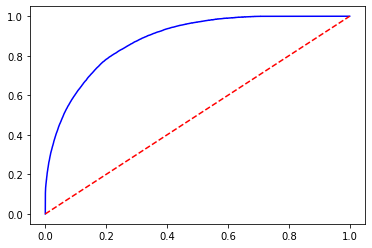

In [256]:
import datetime
def preprocessor(dataframe):
    dataframe['issue_date'] = pd.to_datetime(dataframe['issue_date'])
    dataframe['issue_date_y'] = dataframe['issue_date'].dt.year
    dataframe['issue_date_m'] = dataframe['issue_date'].dt.month

    # set origin date
    # get the diff bewteen now and origin-date
    origin_date = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
    dataframe['issue_date_diff'] = dataframe['issue_date'].apply(lambda x: x-origin_date).dt.days
    dataframe.drop('issue_date', axis = 1, inplace = True)
    
    # earlies_credit_mon
    dataframe['earlies_credit_2'] = pd.to_datetime(dataframe.earlies_credit_2)
    origin_date = datetime.datetime.strptime('1920-06-01', '%Y-%m-%d')
    dataframe['earlies_credit_diff'] = dataframe['earlies_credit_2'].apply(lambda x: x-origin_date).dt.days
    dataframe.drop(['earlies_credit_mon', 'earlies_credit_1', 'earlies_credit_2'], axis = 1, inplace = True)
    # 就业类型
    employer_type = dataframe['employer_type'].value_counts().index
    industry = dataframe['industry'].value_counts().index
    emp_type_dict = dict(zip(employer_type, [0,1,2,3,4,5]))
    industry_dict = dict(zip(industry, [i for i in range(15)]))
    # 
    dataframe['work_year'].fillna('10+ years', inplace=True)

    work_year_map = {'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1,
         '5 years': 5, '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}
    dataframe['work_year']  = dataframe['work_year'].map(work_year_map)

    dataframe['class'] = dataframe['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

    emp_type_dict = {'政府机构': 1, '幼教与中小学校': 2, '高等教育机构': 3, '世界五百强': 4, '上市企业': 5, '普通企业': 6}
    dataframe['employer_type'] = dataframe['employer_type'].map(emp_type_dict)

    dataframe['industry'] = dataframe['industry'].map(industry_dict)
    return dataframe

def get_col_year(dataframe):
    dataframe[['earlies_credit_1','earlies_credit_2']] = dataframe['earlies_credit_mon'].str.split('-', expand=True)
    index = (dataframe.earlies_credit_2 >= str('00')) & (dataframe.earlies_credit_2 < str('22'))
    dataframe['earlies_credit_2'][index] = '20' + dataframe['earlies_credit_2'][index]
    index = (dataframe.earlies_credit_2 >= str('22')) & (dataframe.earlies_credit_2 <= str('99'))
    dataframe['earlies_credit_2'][index] = '19' + dataframe['earlies_credit_2'][index]
    index = (dataframe.earlies_credit_2 >= str('1910')) & (dataframe.earlies_credit_2 <= str('2022'))
    dataframe['earlies_credit_2'][~index] = '2000'
    return dataframe

import numpy as np
def find_outliers_by_3segama(dataframe=None, features=None, label=None, verbose=False, is_drop=False):
    # features are numerical type.
    numerical_col = features
    for col in numerical_col:
        col_std = np.std(dataframe[col])
        col_mean = np.mean(dataframe[col])
        outliers_cut_off = col_std * 3
        lower_rule = col_mean - outliers_cut_off
        upper_rule = col_mean + outliers_cut_off
        dataframe[col + '_outliers'] = dataframe[col].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
        if verbose:
            print(dataframe[col + '_outliers'].value_counts())
            print('-'*35)
            print(dataframe.groupby(col + '_outliers')['isDefault'].sum())
            print('='*50)
    if is_drop:
        for col in numerical_col:
            dataframe = dataframe[dataframe[col + '_outliers']=='正常值']
            dataframe = dataframe.reset_index(drop=True)
            dataframe = dataframe.drop(col+'_outliers', axis=1)
    return dataframe

def drop_cols(dataframe):
    return dataframe.drop(['loan_id', 'user_id', 'policy_code',], axis=1)  # 'scoring_low', 'scoring_high', 'f1', 'early_return_amount_3mon'


def get_mean_of_COL(train_df=None, test_df=None, cols=[], label='label', verbose=False):
    # get mean of col about the label
    for col in cols:
        if verbose:
            print(f'Get mean of {col} about the label.')
        df_dict = train_df.groupby([col])[label].agg(['mean']).reset_index()
        df_dict.index = df_dict[col].values
        dict_col = df_dict['mean'].to_dict()
        train_df[col+'_mean'] = train_df[col].map(dict_col)
        test_df[col+'_mean'] = test_df[col].map(dict_col)
    return train_df, test_df

# -------------------------------------------------------------------------------------------------
# 数据处理
train_net['isDefault'] = train_net['is_default']
common_feature = list(set(train_pub.columns).intersection(set(train_net.columns)))
import copy
train_pub_new = copy.deepcopy(train_pub)
train_net_new = copy.deepcopy(train_net)
train_pub_new = train_pub_new[common_feature]
train_net_new = train_net_new[common_feature]
# 拼接 特征前处理
train_pub_new = get_col_year(train_pub_new)
train_net_new[['earlies_credit_1','earlies_credit_2']] = train_net_new['earlies_credit_mon'].str.split('-', expand=True)
# 特征处理
train_df = pd.concat([train_pub_new, train_net_new])
# train_df = copy.deepcopy(train_pub)

# 学习特征处理
numerical_col = list(train_df.select_dtypes(exclude=['object']).columns)
category_col = list(filter(lambda x: x not in numerical_col,list(train_df.columns)))
train_df[numerical_col] = train_df[numerical_col].fillna(train_df[numerical_col].median())
# train_df[category_col].fillna(train_df[category_col].mode())

train_df = find_outliers_by_3segama(dataframe=train_df, features=numerical_col, label='isDefault', verbose=False, is_drop=True)
# -------------------------

train_df_new = preprocessor(train_df)
train_df_new = drop_cols(train_df_new)
# ======================================
common_feature.remove('isDefault')
test_pub = test_pub[common_feature]
test_pub_new = copy.deepcopy(test_pub)
test_df_new = get_col_year(test_pub_new)
numerical_col.remove('isDefault')
test_df_new[numerical_col] = test_df_new[numerical_col].fillna(train_df[numerical_col].median())
# test_df_new[category_col].fillna(test_df_new[category_col].mode())
test_df_new = preprocessor(test_df_new)
test_df_new = drop_cols(test_df_new)
# =======================================
cols = train_df_new.columns.to_list()
cols.remove('isDefault')
print(cols)
train_df_new, test_df_new = get_mean_of_COL(train_df_new, test_df_new, cols, 'isDefault', True)
# --------------------------------------------------------------------------------------------------------------
# train_df_new.to_csv('train_df_new.csv')
# test_df_new.to_csv('test_df_new.csv')
# 模型训练
X_train = train_df_new.drop('isDefault', axis=1)
y_train = train_df_new['isDefault']
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2)

import lightgbm as lgb
train_matrix = lgb.Dataset(train_x, label=train_y)
valid_matrix = lgb.Dataset(val_x, label=val_y)
params = {
    'boosting_type': 'gbdt',
    'class_weight':'balanced',
            'objective': 'binary',
            'learning_rate': 0.01,
            'metric': 'auc',
            'min_child_weight': 1e-3,
            'num_leaves': 15,
            'max_depth': 12,
            'reg_lambda': 0.5,
            'reg_alpha': 0.5,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 0,
            'seed': 2020,
            'nthread': 8,
            'silent': True,
            'verbose': -1,
            'subsample': 0.5
}

model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=400, verbose_eval=100, early_stopping_rounds=100)

from sklearn import metrics
from sklearn.metrics import roc_auc_score

val_pred_lgb = model.predict(val_x, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(val_y, val_pred_lgb)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.show()

# # 模型预测

predict = model.predict(test_df_new, num_iteration=model.best_iteration)
# # 生成结果
submission = pd.DataFrame({'id':test_pub['loan_id'], 'isDefault':predict})
submission.to_csv('submission.csv', index = None)

In [254]:
# pd.read_csv('submission.csv')
# category_col
train_df[numerical_col].isna().sum()
# train_df[category_col].mode()
# train_df[category_col] = train_df[category_col].fillna(value=dict(train_df[category_col].mode()))
# dict(train_df[category_col].mode())
# train_df[category_col].isna().sum()
# dict(train_df[category_col].mode())
# dd = find_outliers_by_3segama(dataframe=train_df, features=numerical_col, label='isDefault', verbose=True, is_drop=True)
# 数据分桶  减少数据噪音的干扰
test_df_new.columns
test_df_new.monthly_payment
# 整数分箱
np.floor_divide(test_df_new.monthly_payment, 100)  # 取整运算
# log分箱
np.floor(np.log10(test_df_new['monthly_payment']))  # 向下取整
# 分位数分箱
pd.qcut(test_df_new['monthly_payment'], 10, labels=False)
# 卡方分箱 其他分箱
# 。。。。。。
# 特征的交互  TODO 一会搞一下特征的交互
# 需要train / test 一块处理
dataframe = copy.deepcopy(train_pub)
def get_mean_of_COL(train_df=None, test_df=None, cols=[], label='label'):
    # get mean of col about the label
    for col in cols:
        df_dict = train_df.groupby([col])[label].agg(['mean']).reset_index()
    df_dict.index = df_dict[col].values
    dict_col = df_dict['mean'].to_dict
    train_df[col+'_mean'] = train_df[col].map(dict_col)
    test_df[col+'_mean'] = test_df[col].map(dict_col)
    return train_df, test_df
df_dict = train_df.groupby(['scoring_high'])['isDefault'].agg(['mean']).reset_index()
df_dict.index = df_dict['scoring_high'].values
dict_col = df_dict['mean'].to_dict()
train_df['scoring_high'].map(dict_col)
# get columns of columns
# train_pub.groupby(['total_loan'])['f0'].agg('mean')
def get_mean_std_of_CAC(dataframe=None, cols1=[], cols2=[], slience=False):
    # get mean/std of feature about another feature
    for col1 in cols1:
        for col2 in cols2:
            if slience:
                print(f'Get the mean/std. Ex: groupby(\'{col1}\')[\'{col2}\'].transform(\' \')')
            dataframe[col1+'_'+ col2+'_mean'] = train_pub.groupby([col1])[col2].transform('mean')
            dataframe[col1+'_'+ col2+'_std'] = train_pub.groupby([col1])[col2].transform('std')
    return dataframe

Get the mean/std. Ex: groupby('she')['she2'].transform(' ')


c:\zhangli\software\installer\python38\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	training's binary_logloss: 0.363417	valid_1's binary_logloss: 0.363544
[200]	training's binary_logloss: 0.333762	valid_1's binary_logloss: 0.334234
[300]	training's binary_logloss: 0.324576	valid_1's binary_logloss: 0.32562
[400]	training's binary_logloss: 0.320466	valid_1's binary_logloss: 0.322039
[500]	training's binary_logloss: 0.31806	valid_1's binary_logloss: 0.320158
[600]	training's binary_logloss: 0.316441	valid_1's binary_logloss: 0.319024
[700]	training's binary_logloss: 0.315238	valid_1's binary_logloss: 0.318302
[800]	training's binary_logloss: 0.314252	valid_1's binary_logloss: 0.317799
[900]	training's binary_logloss: 0.313417	valid_1's binary_logloss: 0.317454
[1000]	training's binary_logloss: 0.31267	valid_1's binary_logloss: 0.317236
[100]	training's binary_logloss: 0.349704	valid_1's binary_logloss: 0.349854
[200]	training's binary_logloss: 0.326681	valid_1's binary_logloss: 0.327518
[300]	training's binary_logloss: 0.320439	valid_1's binary_logloss: 0.322033
[

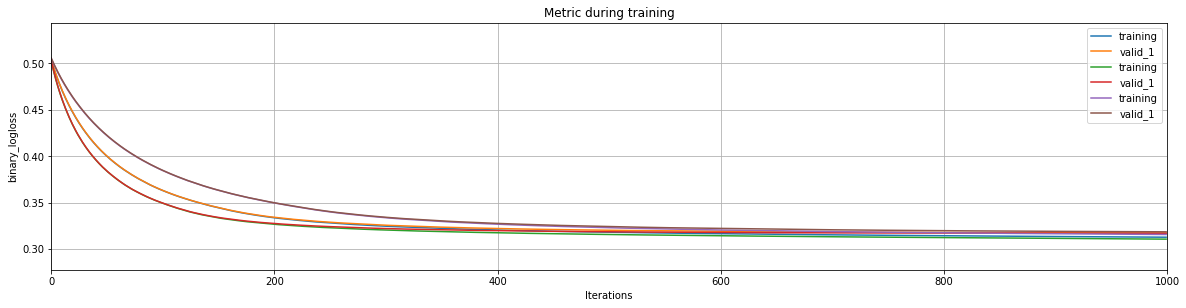

In [257]:
# Adjust the param of lightgbm   use eval_result = {} 
def adjust_lgb_parameters(x_train=None, y_train=None, x_test=None, y_test=None, xlim=None):
    # auc / binary_logloss(binary) / binary_error 
    train_data_l = lgb.Dataset(x_train, label=y_train) 
    valid_data_l = lgb.Dataset(x_test, label=y_test)

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(211)
    xlim = xlim
    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'metric': 'binary_logloss',
        'n_estimators': 1000,
        'max_depth': -1,
        'learning_rate': 0.015,
        'num_leaves': 21,
        'reg_alpha': 0.2,
        'reg_lambda': 0.5,
    }
    evals_result_ori = {}
    model = lgb.train(params, train_set=train_data_l, verbose_eval=100, valid_sets=[train_data_l, valid_data_l], evals_result=evals_result_ori) 
    lgb.plot_metric(evals_result_ori, metric=params['metric'], ax=ax, xlim=xlim)

    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'metric': 'binary_logloss',
        'n_estimators': 1000,
        'max_depth': -1,
        'learning_rate': 0.02,
        'num_leaves': 21,
        'reg_alpha': 0.5,
        'reg_lambda': 0.5,
        'subsample': 0.5
    }
    evals_result_last = {}
    model = lgb.train(params, train_set=train_data_l, verbose_eval=100, valid_sets=[train_data_l, valid_data_l], evals_result=evals_result_last)
    lgb.plot_metric(evals_result_last, metric=params['metric'], ax=ax, xlim=xlim)

    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'metric': 'binary_logloss',
        'n_estimators': 1000,
        'max_depth': 31,
        'learning_rate': 0.01,
        'num_leaves': 21,
        'reg_alpha': 0.5,
        'reg_lambda': 0.5,
        'subsample': 0.5
    }
    evals_result_this = {}
    model = lgb.train(params, train_set=train_data_l, verbose_eval=100, valid_sets=[train_data_l, valid_data_l], evals_result=evals_result_this)
    lgb.plot_metric(evals_result_this, metric=params['metric'], ax=ax, xlim=xlim)
# train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
adjust_lgb_parameters(train_x, train_y, val_x, val_y)

In [265]:
# pd.DataFrame(data=)
dic_zip = dict(zip(X_train.columns, model.feature_importance()))
dic_zip

{'scoring_high': 8,
 'employer_type': 229,
 'f4': 0,
 'recircle_u': 0,
 'title': 0,
 'use': 0,
 'region': 0,
 'initial_list_status': 0,
 'recircle_b': 4,
 'interest': 13,
 'del_in_18month': 0,
 'censor_status': 15,
 'f2': 0,
 'debt_loan_ratio': 0,
 'monthly_payment': 0,
 'class': 100,
 'work_year': 0,
 'house_exist': 104,
 'f3': 0,
 'year_of_loan': 93,
 'early_return_amount_3mon': 8,
 'scoring_low': 0,
 'early_return_amount': 17,
 'f0': 55,
 'total_loan': 0,
 'industry': 0,
 'post_code': 0,
 'pub_dero_bankrup': 0,
 'f1': 0,
 'early_return': 0,
 'issue_date_y': 0,
 'issue_date_m': 0,
 'issue_date_diff': 1,
 'earlies_credit_diff': 0,
 'scoring_high_mean': 45,
 'employer_type_mean': 360,
 'f4_mean': 0,
 'recircle_u_mean': 17,
 'title_mean': 669,
 'use_mean': 0,
 'region_mean': 8,
 'initial_list_status_mean': 0,
 'recircle_b_mean': 1418,
 'interest_mean': 108,
 'del_in_18month_mean': 0,
 'censor_status_mean': 0,
 'f2_mean': 0,
 'debt_loan_ratio_mean': 342,
 'monthly_payment_mean': 1171,
 '